##### importing dependecie to check the data information

In [38]:
import pandas as pd
import numpy as np


In [39]:
data = pd.read_csv('advertising.csv')
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [40]:
data.shape

(200, 4)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [42]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [43]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

##### Explorative analysis on the data

Text(0.5, 1.0, 'Distribution of Newspaper to check for outliers')

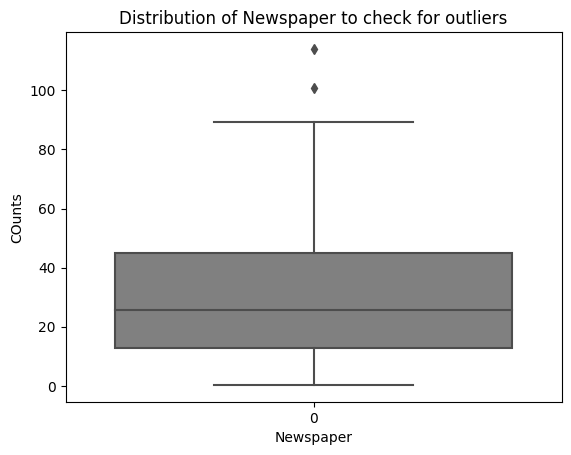

In [44]:
#check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data["Newspaper"], color='gray')
plt.xlabel("Newspaper")
plt.ylabel("COunts")
plt.title("Distribution of Newspaper to check for outliers")
        




Text(0.5, 1.0, 'Distribution of TV to check for outliers')

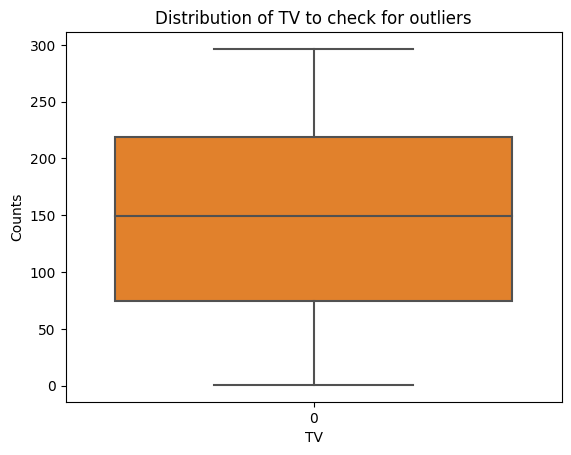

In [45]:
#check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data["TV"], color='#ff7f0e')
plt.xlabel("TV")
plt.ylabel("Counts")
plt.title("Distribution of TV to check for outliers")
        




Text(0.5, 1.0, 'Distribution of Newspaper to check for outliers')

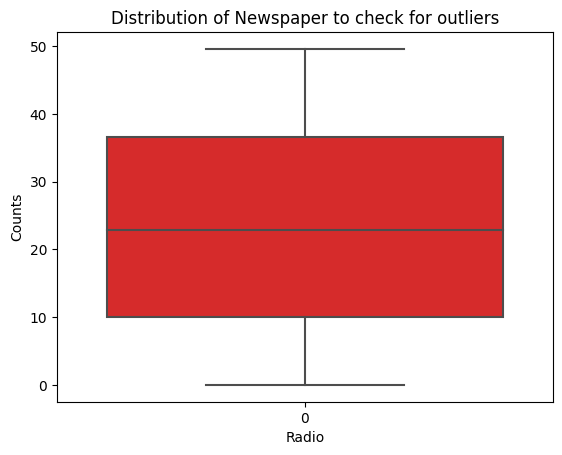

In [46]:
#check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data["Radio"], color='#f30f0e')
plt.xlabel("Radio")
plt.ylabel("Counts")
plt.title("Distribution of Newspaper to check for outliers")
        




###### checking the correlation between the columns

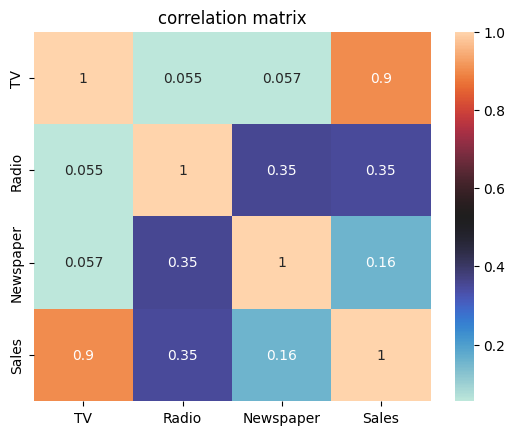

In [47]:
data_corr_matrix = data.corr()
sns.heatmap(data_corr_matrix, annot=True, cmap='icefire')
plt.title("correlation matrix")
plt.show()

##### As you can see, TV has the higher correlation ranking with sale which means that the value of sales increase with that of television advertising pay. This can be due to the larger audience compared to other means

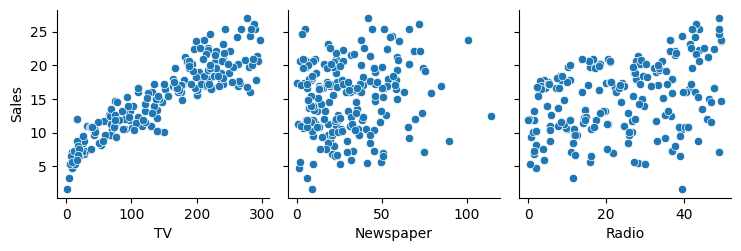

In [48]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'], y_vars=['Sales'], kind="scatter")

###### 

##### Proceeding to train test plit and evaluation of the model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


In [50]:
x = data.drop(columns='Sales', axis=1)
y = data['Sales']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


In [52]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_sco = r2_score(y_test, y_pred)


print('mean squared error is: ', round(mse,3))
print('mean absolute error is: ', round(mae,3))
print('r2 score is: ', round(r2_sco,3))



mean squared error is:  2.651
mean absolute error is:  1.184
r2 score is:  0.907


In [53]:
coefficient = pd.DataFrame({'feature':x.columns, 'Coefficient': model.coef_})
print(coefficient)

     feature  Coefficient
0         TV     0.054851
1      Radio     0.100476
2  Newspaper     0.005881


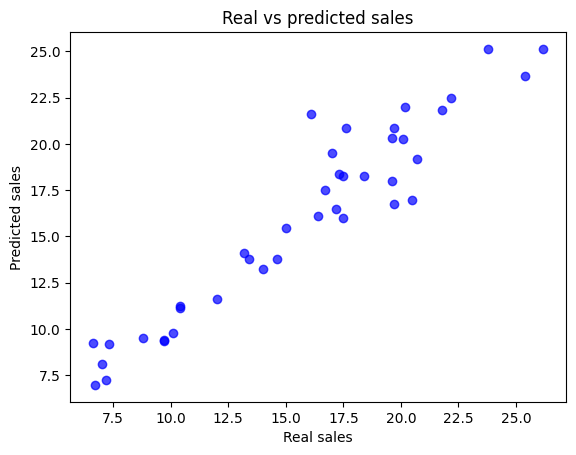

In [54]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Real sales')
plt.ylabel('Predicted sales')
plt.title('Real vs predicted sales')
plt.show()

In [55]:
## DEfining hyperparameter
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept' :[True, False],  
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs= -1)

grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred  = best_model.predict(x_test)
print('best grid parameters ' ,grid_search.best_params_ )
me =  mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(me, r2)

best grid parameters  {'fit_intercept': True}
2.6513158619271344 0.9073191500253454
